# Μελέτη εποχικότητας με την μέθοδο της αποσύνθεσης χρονοσειράς εκτιμώντας προσθετικό μοντέλο
### y(t) = Observed + Trend + Seasonality + Residual

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Εισαγωγή δεδομένων και διαμόρφωση σε μέσες ημερήσιες τιμές.

In [11]:
df = pd.read_csv('kunak_filled.csv', parse_dates=['Datetime'], index_col='Datetime')
df = df.resample('D').mean()
df.head()

,Dew Point (C),H2S (ppb),Humidity (%),NO2 (ppb),O3 (ppb),Pressure (hPa),TSP (ug/m3),Temp (C)
Datetime,,,,,,,,
2022-04-10,6.055000,6.988750,52.842917,18.699583,23.745833,1002.805000,11.876667,16.300833
2022-04-11,2.251250,0.655833,36.071667,4.787500,48.096250,1013.076250,10.005833,13.793750
2022-04-12,3.584583,5.760000,34.426250,17.662500,36.747917,1018.318333,9.144583,14.545417
2022-04-13,4.907500,4.475417,53.863333,23.900417,28.420000,1017.626250,11.202500,14.400000
2022-04-14,6.852917,7.202500,60.392917,26.526667,23.560000,1019.456250,17.388750,15.116250


In [12]:
h2s = seasonal_decompose(df['H2S (ppb)'], period=7)
no2 = seasonal_decompose(df['NO2 (ppb)'], period=7)
o3 = seasonal_decompose(df['O3 (ppb)'], period=7)
tsp = seasonal_decompose(df['TSP (ug/m3)'], period=7)

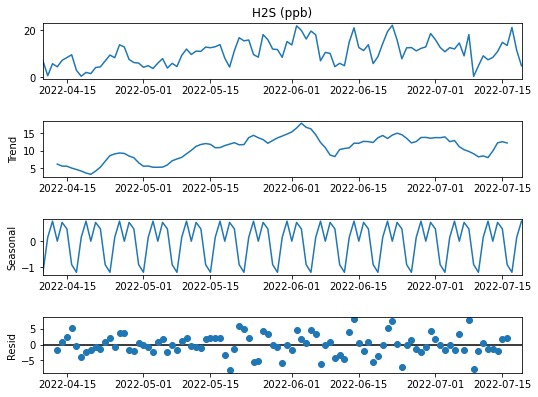

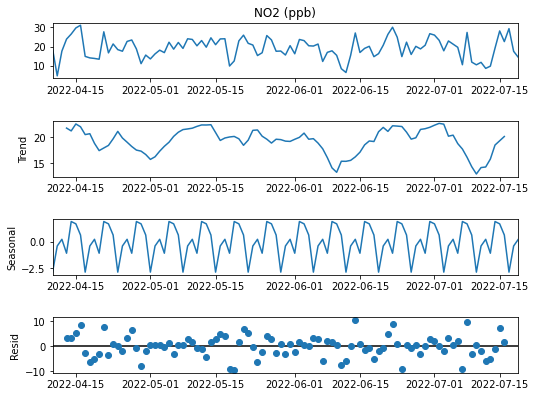

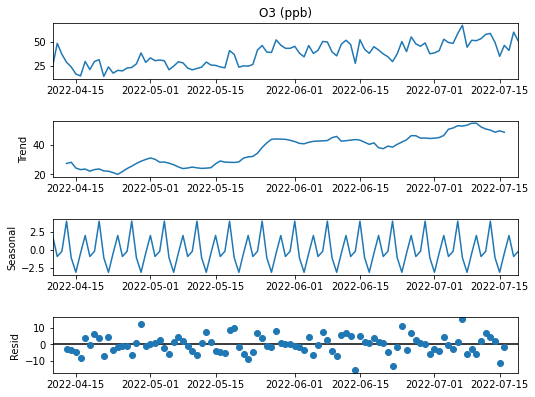

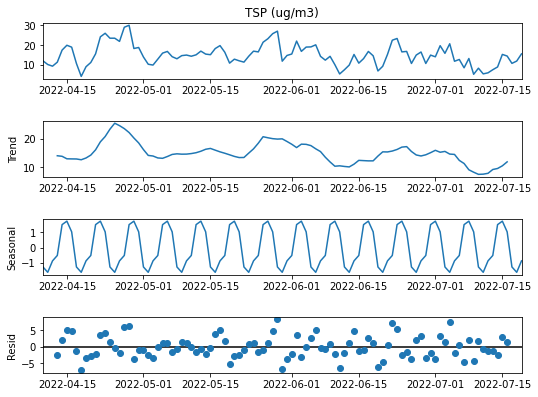

In [13]:
h2s.plot().set_size_inches(8,6)
no2.plot().set_size_inches(8,6)
o3.plot().set_size_inches(8,6)
tsp.plot().set_size_inches(8,6)
plt.show()

#### Περιοδικότητα

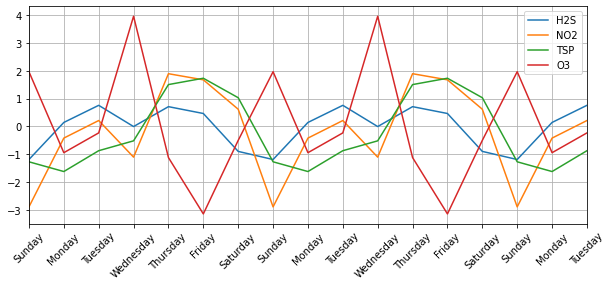

In [14]:
days = 17
plt.figure(figsize=(10,4))

h2s.seasonal[:days].plot(grid=True, label='H2S')
no2.seasonal[:days].plot(grid=True, label='NO2')
tsp.seasonal[:days].plot(grid=True, label='TSP')
o3.seasonal[:days].plot(grid=True, label='O3')

plt.xticks(df.index[:days], df.index.day_name()[:days], rotation=45)
plt.legend()
plt.xlabel('')
plt.show()